In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Data Collection & Understanding

In [3]:
iris_df=pd.read_csv("IRIS.csv")
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
iris_df.shape

(150, 5)

In [5]:
iris_df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [14]:
iris_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris_df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### EDA

In [12]:
iris_df.drop_duplicates(inplace=True)

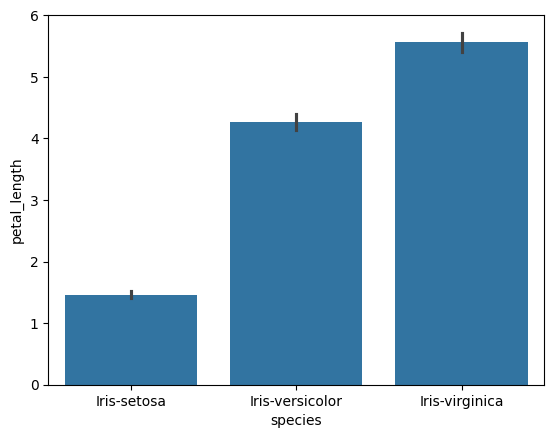

In [17]:
#sepal_length vs species
sns.barplot(x=iris_df.species,y=iris_df['petal_length'],data=iris_df)
plt.show()

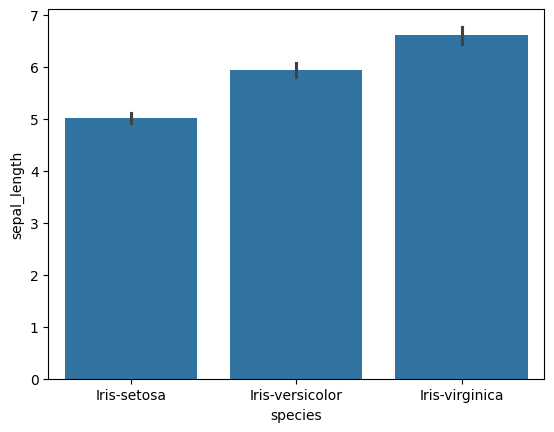

In [18]:
sns.barplot(x=iris_df.species,y=iris_df['sepal_length'],data=iris_df)
plt.show()

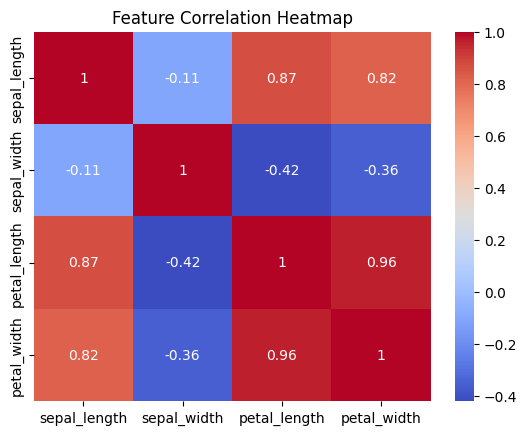

In [24]:
sns.heatmap(iris_df.drop('species', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


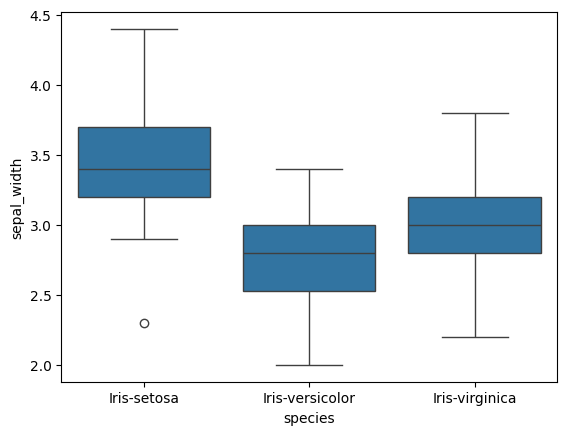

In [31]:
sns.boxplot(x=iris_df.species,y=iris_df['sepal_width'],data=iris_df)
plt.show()

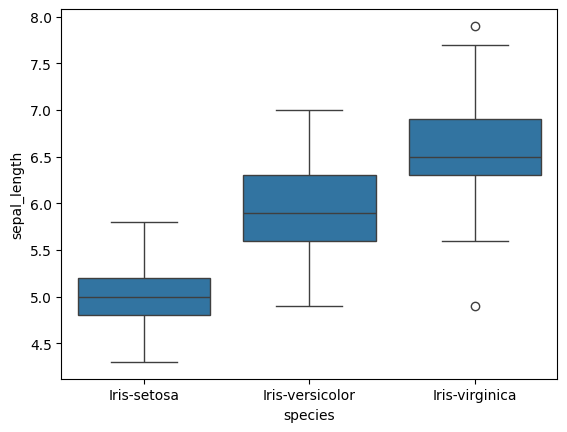

In [32]:
sns.boxplot(x=iris_df.species,y=iris_df['sepal_length'],data=iris_df)
plt.show()

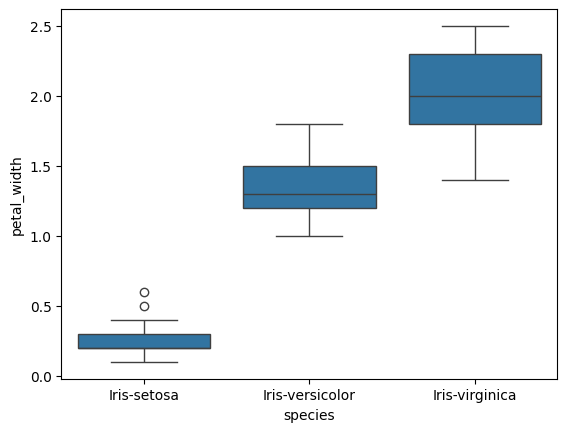

In [33]:
sns.boxplot(x=iris_df.species,y=iris_df['petal_width'],data=iris_df)
plt.show()

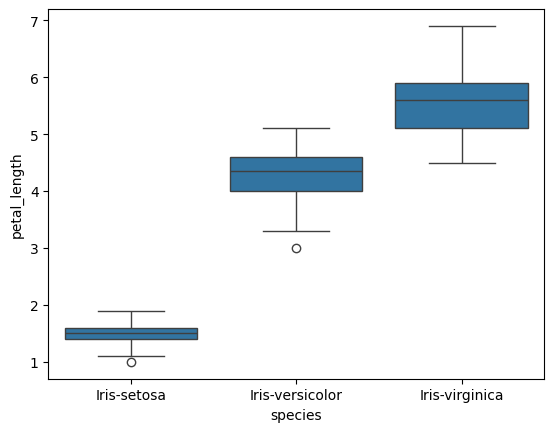

In [34]:
sns.boxplot(x=iris_df.species,y=iris_df['petal_length'],data=iris_df)
plt.show()

##### observations:
                    1.Totally data have some outliers.
                    2.Have high correlation with petal(length,width)  with others. it is recommended to delete but here it will no need.

In [41]:
numerical_cols=iris_df[['sepal_length','sepal_width','petal_length','petal_width']].copy()
numerical_cols

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [50]:
target=iris_df['species'].copy()
target

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 147, dtype: object

#### outlier removal

In [43]:
Q1 = numerical_cols[['sepal_length','sepal_width','petal_length','petal_width']].quantile(0.25)
Q3 = numerical_cols[['sepal_length','sepal_width','petal_length','petal_width']].quantile(0.75)
IQR = Q3 - Q1

# Filter out the outliers
df_clean = numerical_cols[~((numerical_cols[['sepal_length','sepal_width','petal_length','petal_width']] < (Q1 - 1.5 * IQR)) | (numerical_cols[['sepal_length','sepal_width','petal_length','petal_width']] > (Q3 + 1.5 * IQR))).any(axis=1)]
df_clean

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


#### categorical variables handling

In [45]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [51]:
Target=le.fit_transform(target)
Target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### Model

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(numerical_cols,Target, test_size=0.2, random_state=42)

In [55]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [56]:
y_pred=lr.predict(X_test)

In [75]:
y_pred
dict_1={0:' Iris-setosa',1:'Iris-versicolor',2:'Iris-virginica'}
for i in y_pred:
    if i in dict_1:
        print(dict_1[i])

 Iris-setosa


In [65]:
accuracy_score(y_pred,y_test)

0.9333333333333333

In [66]:
classification_report(y_pred,y_test)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        11\n           1       0.90      0.90      0.90        10\n           2       0.89      0.89      0.89         9\n\n    accuracy                           0.93        30\n   macro avg       0.93      0.93      0.93        30\nweighted avg       0.93      0.93      0.93        30\n'

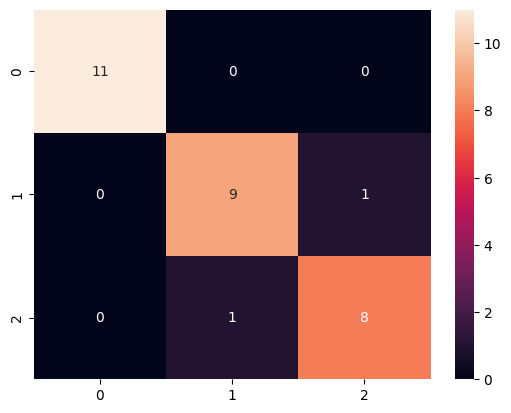

In [67]:
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True)
plt.show()

#### model_testing

In [76]:


input_data = pd.DataFrame([[5.1, 3.5, 1.4, 0.2]], 
                          columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

y_pred = lr.predict(input_data)

In [77]:
y_pred 

array([0])

In [79]:

dict_1={0:' Iris-setosa',2:'Iris-versicolor',3:'Iris-virginica'}
for i in y_pred:
    if i in dict_1:
        print(dict_1[i])